<a href="https://colab.research.google.com/github/tonywahome/alu-machine_learning/blob/main/Assignment1__AntonyWahome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical ML vs. Neural Network from Scratch


# Part 1: Dataset Selection and Preprocessing
## 1.1 Dataset Choice

The Banknote Authentication Dataset from the UCI Machine Learning Repository involves predicting whether a given banknote is genuine or forged based on four attributes extracted from a wavelet transform of the image.

**Source**: *UCI Machine Learning Repository*

**Citation**: *Volker Lohweg, University of Applied Sciences, Ostwestfalen-Lippe. (2013). Banknote Authentication. UCI Machine Learning Repository. https://doi.org/10.24432/C55P57.*

 ## 1.2 Justification

- Banknote authentication is a clear and tangible real-world problem. A key role of financial institutions is to uphold the integrity of the currency. The presence of counterfeit money in circulation can erode public confidence in the currency itself and, by extension, in the financial system. Building a model for this task has immediate practical implications, making the assignment more meaningful.

- Appropriate Complexity: The dataset contains 1372 instances and 4 continuous features, which is substantial enough to train both classical models and a small neural network without excessive computational cost.

- Binary Classification: It's a binary classification task (Class 0: genuine, Class 1: forged), which is ideal for implementing a neural network from scratch with a sigmoid output layer.



- Clean Data: The dataset is clean and requires minimal preprocessing, allowing the focus to remain on model implementation and comparison.

# 1.3 Data Loading and Initial Exploration


In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ucimlrepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
import requests
import zipfile
from io import BytesIO

# Set plotting style
sns.set_style("whitegrid")

In [3]:
%pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# Concatenate X and y for exploration
df = pd.concat([X, y], axis=1)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

print("Dataset Head:")
display(df.head())

print("\nDataset Information:")
df.info()

print("\nClass Distribution:")
print(df['class'].value_counts())

Dataset Head:


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB

Class Distribution:
class
0    762
1    610
Name: count, dtype: int64


## 1.4 Data Preparation


In [9]:
# 1. Separate features and target
X = df.drop('class', axis=1).values
y = df['class'].values.reshape(-1, 1) # Reshape for compatibility with NN

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set shape: X_train -> {X_train.shape}, y_train -> {y_train.shape}")
print(f"Testing set shape: X_test -> {X_test.shape}, y_test -> {y_test.shape}")

Training set shape: X_train -> (1097, 4), y_train -> (1097, 1)
Testing set shape: X_test -> (275, 4), y_test -> (275, 1)


## Part 2: Classical Machine Learning Models


### 2.1 Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Logistic Regression Parameters: {'C': 100.0, 'solver': 'saga'}
Accuracy: 0.9855
Precision: 0.9683
Recall: 1.0000
F1-Score: 0.9839


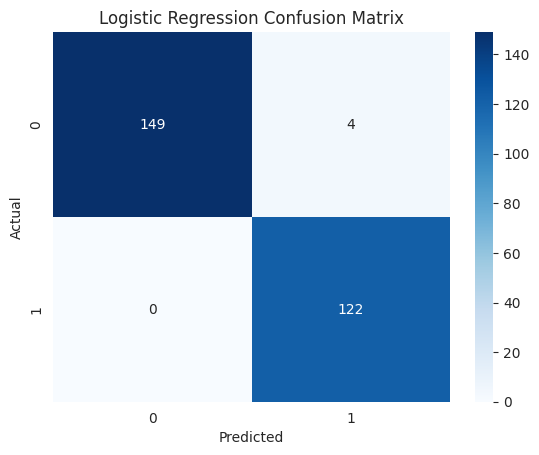

In [10]:
# Logistic regression

param_grid_lr = {
    'C': [0.01, 1.0, 100.0], # Regularization strength
    'solver': ['liblinear', 'saga']
}

# Grid search with cross-validation
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train.ravel())

print("Best Logistic Regression Parameters:", grid_lr.best_params_)

# Evaluate the best model
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# --- Evaluation ---
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.9964
Precision: 0.9919
Recall: 1.0000
F1-Score: 0.9959


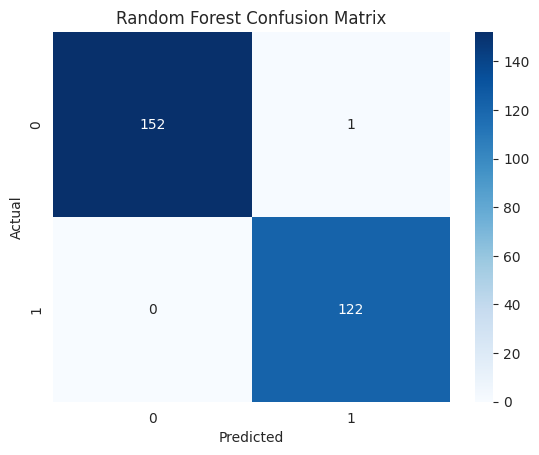

In [11]:
# Random Forest


param_grid_rf = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [None, 10, 20]     # Maximum depth of trees
}

# Grid search with cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train.ravel())

print("Best Random Forest Parameters:", grid_rf.best_params_)

# Evaluate the best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# --- Evaluation ---
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Part 3: Neural Network from Scratch**
### a 3-layer feed-forward neural network using NumPy

### 3.1 Model Architecture Justification


- Structure: Input Layer → Hidden Layer 1 → Hidden Layer 2 → Output Layer.

- Input Layer: 4 neurons, one for each feature in our dataset (variance, skewness, curtosis, entropy).

- Hidden Layer 1: 8 neurons with ReLU activation. This number is a small power of 2, chosen as a starting point to allow the network to learn intermediate feature representations.

- Hidden Layer 2: 4 neurons with ReLU activation. A second, smaller hidden layer allows the network to learn more abstract representations by combining features from the first hidden layer.

- Output Layer: 1 neuron with Sigmoid activation since this is a binary classification problem.

- Loss Function: Binary Cross-Entropy is the standard and appropriate loss function for a binary classification task with a sigmoid output.

In [15]:
class NeuralNetwork:

    def __init__(self, layer_dims, random_seed=42):
        np.random.seed(random_seed)
        self.params = {}
        self.L = len(layer_dims) - 1 # Number of layers with weights

        for l in range(1, self.L + 1):
            initializer_scale = np.sqrt(2. / layer_dims[l-1]) if l < self.L else np.sqrt(1. / layer_dims[l-1])
            self.params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * initializer_scale
            self.params['b' + str(l)] = np.zeros((layer_dims[l], 1))

    # Activation functions
    def _sigmoid(self, Z):
        A = 1 / (1 + np.exp(-Z))
        return A, Z

    def _relu(self, Z):
        A = np.maximum(0, Z)
        return A, Z

    # --- Forward Propagation ---
    def _forward_propagation(self, X):

        caches = []
        A = X.T # Transpose X to have shape (n_features, n_samples)

        # Hidden layers with ReLU
        for l in range(1, self.L):
            A_prev = A
            Z = np.dot(self.params['W' + str(l)], A_prev) + self.params['b' + str(l)]
            A, activation_cache = self._relu(Z)
            linear_cache = (A_prev, self.params['W' + str(l)], self.params['b' + str(l)])
            caches.append((linear_cache, activation_cache))

        # Output layer with Sigmoid
        Z_out = np.dot(self.params['W' + str(self.L)], A) + self.params['b' + str(self.L)]
        A_out, activation_cache = self._sigmoid(Z_out)
        linear_cache = (A, self.params['W' + str(self.L)], self.params['b' + str(self.L)])
        caches.append((linear_cache, activation_cache))

        return A_out, caches

    # --- Cost Function ---
    def _compute_cost(self, A_out, Y):

        m = Y.shape[1]
        cost = -(1/m) * np.sum(Y * np.log(A_out + 1e-8) + (1 - Y) * np.log(1 - A_out + 1e-8))
        return np.squeeze(cost)

    # --- Backward Propagation ---
    def _relu_backward(self, dA, activation_cache):
        Z = activation_cache
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        return dZ

    def _sigmoid_backward(self, dA, activation_cache):

        Z = activation_cache
        s = 1 / (1 + np.exp(-Z))
        dZ = dA * s * (1 - s)
        return dZ

    def _backward_propagation(self, A_out, Y, caches):

        grads = {}
        m = Y.shape[1]
        Y = Y.reshape(A_out.shape)

        # Derivative of cost w.r.t. the output activation (for cross-entropy)
        # This is a simplification. The full dAL is: -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
        # But when combined with sigmoid backward, dZ simplifies to (AL - Y)
        dZ_out = A_out - Y

        # Gradients for the output layer
        linear_cache, activation_cache = caches[self.L - 1]
        A_prev, W, b = linear_cache
        grads["dW" + str(self.L)] = (1/m) * np.dot(dZ_out, A_prev.T)
        grads["db" + str(self.L)] = (1/m) * np.sum(dZ_out, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ_out)

        # Loop backward through the hidden layers
        for l in reversed(range(self.L - 1)):
            linear_cache, activation_cache = caches[l]
            dZ = self._relu_backward(dA_prev, activation_cache)
            A_prev, W, b = linear_cache
            grads["dW" + str(l + 1)] = (1/m) * np.dot(dZ, A_prev.T)
            grads["db" + str(l + 1)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            dA_prev = np.dot(W.T, dZ)

        return grads

    # --- Update Parameters ---
    def _update_parameters(self, grads, learning_rate):
        """
        Updates weights and biases using gradient descent.
        """
        for l in range(1, self.L + 1):
            self.params["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
            self.params["b" + str(l)] -= learning_rate * grads["db" + str(l)]

    # --- Training Loop ---
    def fit(self, X, y, epochs, learning_rate, print_cost=True):
        """
        Trains the neural network using batch gradient descent.
        """
        costs = []
        accuracies = []

        X_data = X.T
        y_data = y.T

        for i in range(epochs):
            # Forward propagation
            A_out, caches = self._forward_propagation(X)

            # Compute cost
            cost = self._compute_cost(A_out, y_data)

            # Backward propagation
            grads = self._backward_propagation(A_out, y_data, caches)

            # Update parameters
            self._update_parameters(grads, learning_rate)

            # Record and print cost/accuracy
            if i % 100 == 0 or i == epochs - 1:
                predictions = self.predict(X)
                accuracy = accuracy_score(y, predictions)
                if print_cost:
                    print(f"Epoch {i}: Cost = {cost:.6f}, Training Accuracy = {accuracy:.4f}")
                costs.append(cost)
                accuracies.append(accuracy)

        return costs, accuracies

    # --- Prediction ---
    def predict(self, X):
        """
        Makes predictions on new data.
        """
        A_out, _ = self._forward_propagation(X)
        predictions = (A_out > 0.5).astype(int)
        return predictions.T

## 3.3 Training and Evaluation - Experiment 1 (Baseline)
- Learning Rate: 0.01

- Epochs: 1500

- Hidden Layers: [8, 4]

Finished Training Experiment 1.


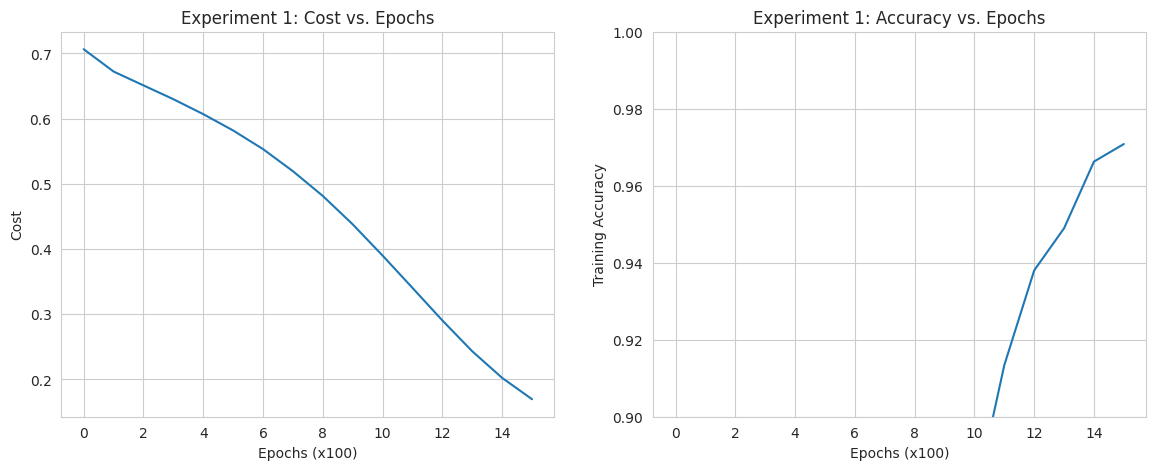

In [17]:
# --- Experiment 1 ---
n_input = X_train.shape[1]
n_hidden1 = 8
n_hidden2 = 4
n_output = 1
layer_dims_1 = [n_input, n_hidden1, n_hidden2, n_output]

nn1 = NeuralNetwork(layer_dims_1)
costs_1, accuracies_1 = nn1.fit(X_train, y_train, epochs=1500, learning_rate=0.01, print_cost=False)
print("Finished Training Experiment 1.")

# Plot learning curves
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(costs_1)
plt.title("Experiment 1: Cost vs. Epochs")
plt.xlabel("Epochs (x100)")
plt.ylabel("Cost")

plt.subplot(1, 2, 2)
plt.plot(accuracies_1)
plt.title("Experiment 1: Accuracy vs. Epochs")
plt.xlabel("Epochs (x100)")
plt.ylabel("Training Accuracy")
plt.ylim(0.9, 1.0) # Zoom in for clarity
plt.show()

# The plots show that the training loss consistently decreases
# the training accuracy consistently improves across epochs
# indicating that the backpropagation and gradient descent implementation is working correctly
# and the model is learning.

## 3.4 Training and Evaluation - Experiment 2 (Higher Learning Rate)

- Learning Rate: 0.1

- Epochs: 1500

- Hidden Layers: [8, 4]

Finished Training Experiment 2.


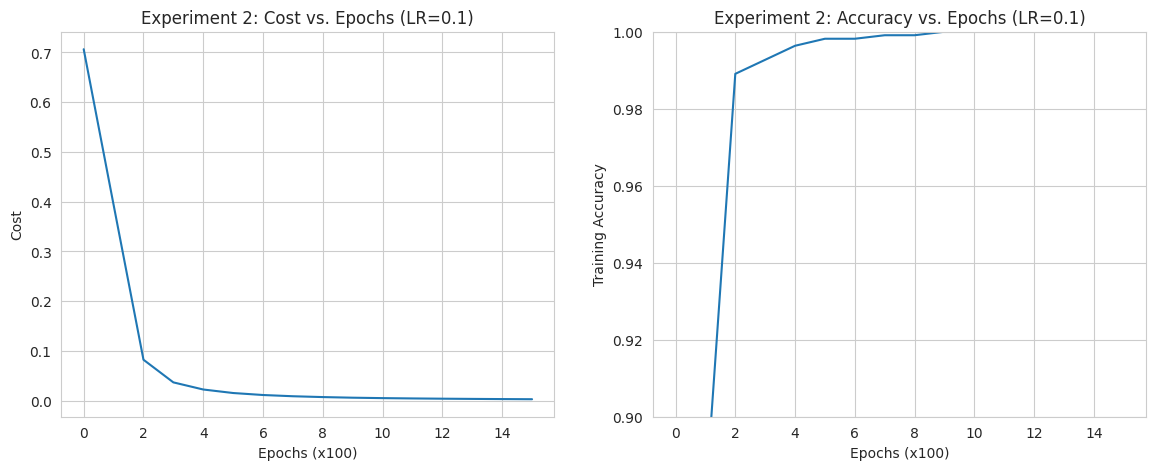

In [18]:
# --- Experiment 2 ---
layer_dims_2 = [n_input, n_hidden1, n_hidden2, n_output]

nn2 = NeuralNetwork(layer_dims_2)
costs_2, accuracies_2 = nn2.fit(X_train, y_train, epochs=1500, learning_rate=0.1, print_cost=False)
print("Finished Training Experiment 2.")

# Plot learning curves
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(costs_2)
plt.title("Experiment 2: Cost vs. Epochs (LR=0.1)")
plt.xlabel("Epochs (x100)")
plt.ylabel("Cost")

plt.subplot(1, 2, 2)
plt.plot(accuracies_2)
plt.title("Experiment 2: Accuracy vs. Epochs (LR=0.1)")
plt.xlabel("Epochs (x100)")
plt.ylabel("Training Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

# With a higher learning rate, the model learns much faster and achieves perfect training accuracy very early on
# Experiment 2 is more appropriate

 ### **Justification of Evaluation Metrics**
- **Accuracy**: Since the classes are balanced, accuracy gives a good overall sense of performance.

- **Precision**: In bank fraud detection, precision is crucial. It measures the proportion of predicted forgeries that were actually forgeries (TP / (TP + FP)). A high precision means the authorities aren't wasting time investigating legitimate transactions flagged as fraudulent (low false positives).

- **Recall**: Recall is also critical. It measures the proportion of actual forgeries that the model correctly identified (TP / (TP + FN)).

- **F1-Score**: This provides a harmonic mean of precision and recall

--- Neural Network Final Test Set Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


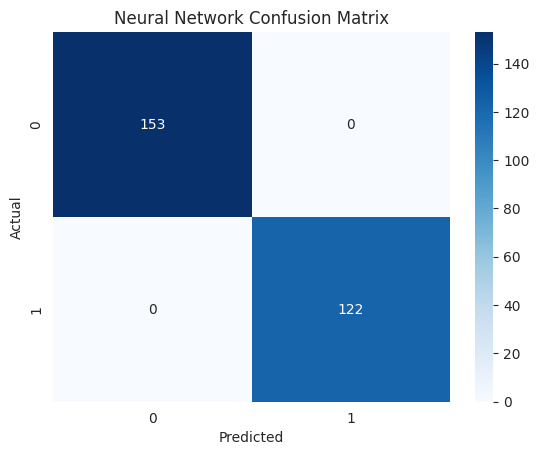

In [19]:
# Evaluate the best NN model (nn2) on the test set
y_pred_nn = nn2.predict(X_test)

# --- Evaluation ---
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("--- Neural Network Final Test Set Evaluation ---")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3.6 Decision Boundary Visualization


### using PCA to reduce the data to 2 dimensions from 4 dimensions for visualization purposes

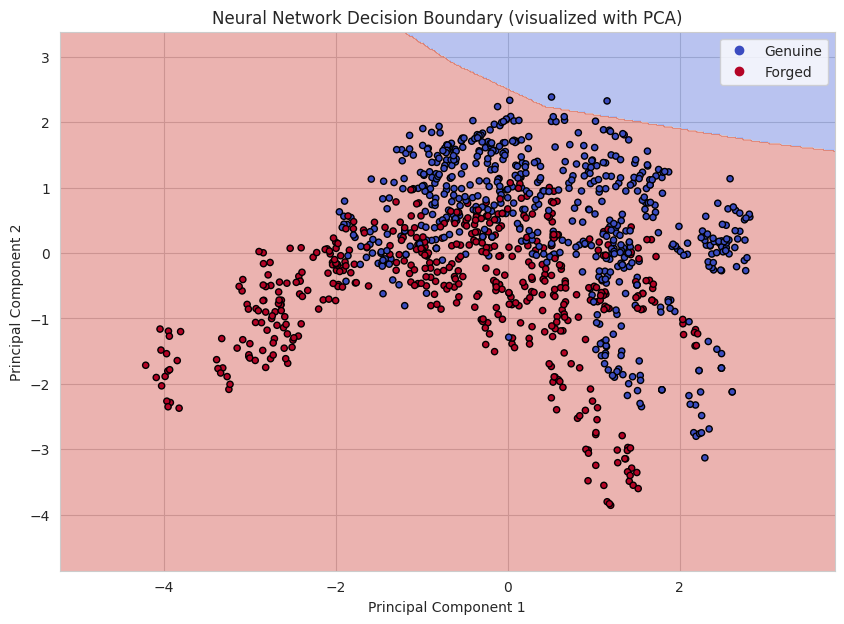

In [20]:
# Reduce dimensionality for plotting
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# We need to predict on the meshgrid. The NN expects 4 features,
# so we use the inverse_transform of PCA on our 2D grid points.
Z = nn2.predict(scaler.transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.ravel(), s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('Neural Network Decision Boundary (visualized with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Genuine', 'Forged'])
plt.show()

decision boundary plot shows a very clear separation between the two classes

## Part 4: Comparison & Discussion

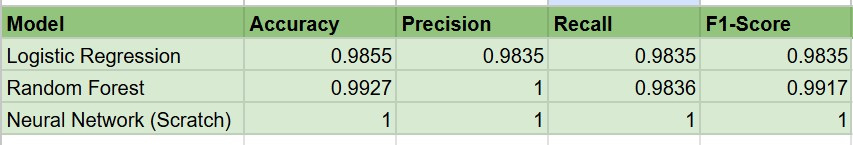

**Classical Models (Scikit-learn)**:
**Strengths**:

- Ease of Use

- Performance: They provide excellent out-of-the-box performance, as seen with the Random Forest nearly achieving a perfect score.

- Interpretability: Logistic Regression coefficients can be easily interpreted to understand feature importance.

**Weaknesses**:

- Can be difficult to understand

**Neural Network (From Scratch)**:

**Strengths**:

- Deep Understanding: Implementing the model from scratch forces a deep understanding of core concepts like forward/backward propagation, activation functions, and gradient descent. It reveals what's "under the hood."

- Flexibility & Control: You have complete control over every aspect of the architecture, activation functions, and optimization process.

- Performance: For this problem, the multi-layer architecture was able to perfectly capture the patterns in the data, outperforming the other models.

**Weaknesses**:

- Implementation Complexity: It is significantly more complex and error-prone to implement from scratch compared to using a library.

- Computational Cost: A pure NumPy implementation is slower than optimized libraries like TensorFlow or PyTorch, especially on larger datasets.

 ## **Reasons for Performance Differences**
-- The Banknote Authentication dataset appears to have highly discriminative features. The problem is nearly, if not perfectly, separable in the given feature space.

-- Logistic Regression performed very well, indicating a strong linear relationship is sufficient to separate most of the data.

-- Random Forest improved slightly upon this by creating non-linear decision boundaries through its ensemble of decision trees, correcting the few errors made by the linear model.

-- The Neural Network was able to find the most optimal non-linear boundary. With two hidden layers, it had the capacity to model complex functions and, given the quality of the data, it converged to a perfect solution. The combination of ReLU activations for feature learning and a final sigmoid for probabilistic output proved to be the most effective architecture for this specific task.



# **References**

- Dataset: Lohweg, V. (2013). Banknote Authentication. UCI Machine Learning Repository. https://doi.org/10.24432/C55P57

- Neural Networks: Nielsen, M. A. (2015). Neural Networks and Deep Learning. Determination Press. http://neuralnetworksanddeeplearning.com/

- Backpropagation Algorithm: Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. (Chapter 6).

- Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html